In [75]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.losses import mean_squared_error

In [83]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [84]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [85]:
insurance['smoker'] = insurance['smoker'].map({'yes': 1, 'no': 0})

In [86]:
insurance['sex'] = insurance['sex'].map({'male': 1, 'female': 0})

In [88]:
ohe = OneHotEncoder(sparse=False)
insurance_one_hot = ohe.fit_transform(insurance[['region']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [90]:
encoded_cols = ohe.get_feature_names_out(["region"])

# Create a dataframe with the encoded data
encoded_df = pd.DataFrame(insurance_one_hot, columns=encoded_cols)

In [92]:
insurance.drop(columns=['region'], inplace=True)

In [95]:
insurance = pd.concat([insurance, encoded_df] ,axis=1)

In [96]:
X = insurance.drop(columns=['charges'])
y = insurance['charges']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [105]:
model = Sequential(
    layers=[
        Dense(units=32, input_dim=9),

        Dense(units=1)
    ]
)
optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss="mae", metrics=['mae'])

In [106]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13366.9414 - mae: 13366.9414
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13364.3730 - mae: 13364.3730
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13361.8154 - mae: 13361.8154
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13359.2686 - mae: 13359.2686
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13356.7070 - mae: 13356.7070
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13354.1533 - mae: 13354.1533
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 13351.5781 - mae: 13351.5781
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 13348.9990 - mae: 13348.9990
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 13346.4082 - mae: 13346.4082
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 13343.79

Text(0.5, 0, 'epochs')

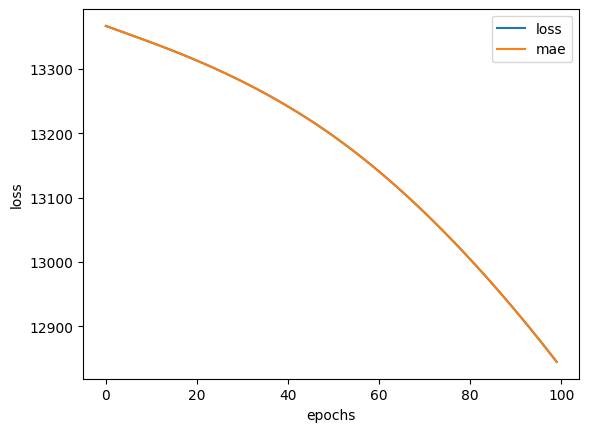

In [107]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [108]:
from sklearn.compose import make_column_transformer
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
X = insurance.drop(columns=['charges'])
y = insurance['charges']
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']),
    (OneHotEncoder(sparse=False), ['sex', 'smoker', 'region'])
)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)
X_train_normal = ct.fit_transform(X_train)
X_test_normal = ct.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13343.8496 - mae: 13343.8496
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13335.1914 - mae: 13335.1914
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13313.5762 - mae: 13313.5762
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13267.6855 - mae: 13267.6855
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13185.5615 - mae: 13185.5615
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13056.1094 - mae: 13056.1094
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 12869.5000 - mae: 12869.5000
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 12615.4609 - mae: 12615.4609
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12284.9932 - mae: 12284.9932
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11873.79

Text(0.5, 0, 'epochs')

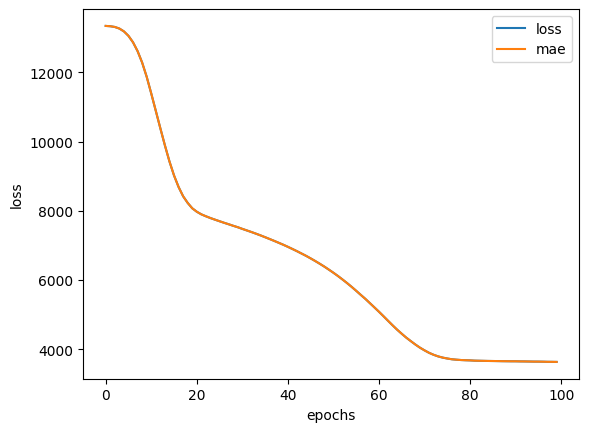

In [112]:
model = Sequential(
    layers=[
        Dense(units=100, input_dim=11),
        Dense(units=10),
        Dense(units=1)
    ]
)
# optimizer = Adam(learning_rate=1e-4)
model.compile(optimizer="adam", loss="mae", metrics=['mae'])

history = model.fit(X_train_normal, y_train, epochs=200)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")